In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [2]:
T = 1000    #Number of conformations
N = 100     #Number of monomers
b = 3       #Bond Length

#Reading the generated .xyz file for corresponding parameter values
x,y,z = np.zeros([T,N+1]),np.zeros([T,N+1]),np.zeros([T,N+1])
with open(f'simulation_FJC_b=3.0_N=100_T=1000.xyz','r') as f:
    for t in range(T):
        line1 = f.readline()
        line2 = f.readline()
        for i in range(N+1):
            data = f.readline()
            values = data.split( )
            x[t,i] = float(values[1])
            y[t,i] = float(values[2])
            z[t,i] = float(values[3])

In [26]:
#Sampling the scattering vector 
K = np.linspace(0,0.2,100)

#Calculating (R(i) - R(j)) for all i,j's
R = []
for t in range(T):
    r = np.zeros([N,N])
    for i in range(N):
        for j in range(i):   #Since R is symmetric
            r[i][j] = math.sqrt((x[t,i]-x[t,j])**2 + (y[t,i]-y[t,j])**2 + (z[t,i]-z[t,j])**2)
            r[j][i] = r[i][j]
    R.append(r)

In [29]:
#Calculating Structure Factor
I = []
for k in K:
    a = []
    for r in R:
        i = np.sin(k*r)/(k*r)
        i = np.nan_to_num(i)    #Since diagonal elements are zero in R
        a.append(i)
    I.append(np.mean(a))
I = I[1:]                      
K = K[1:]

/tmp/ipykernel_3295/743579698.py:5: RuntimeWarning: invalid value encountered in divide
  i = np.sin(k*r)/(k*r)


## Guinier Approximation

In [31]:
#Calculating Rg**2 for every conformation
Rg_2 = []
for i in range(T):
    x_cm = np.mean(x[i,:])
    y_cm = np.mean(y[i,:])
    z_cm = np.mean(z[i,:])
    r = np.mean((x[i,:]-x_cm)**2 + (y[i,:]-y_cm)**2 + (z[i,:]-z_cm)**2)
    Rg_2.append(r)

In [32]:
Rg = math.sqrt(np.mean(Rg_2))

In [39]:
#Guinier Approximation
def guinier_approximation(K,Rg):
    i = (N+1)**2 *(1-(K*Rg)**2 / 3)/10000
    return i

In [43]:
I_theory = guinier_approximation(K,Rg)

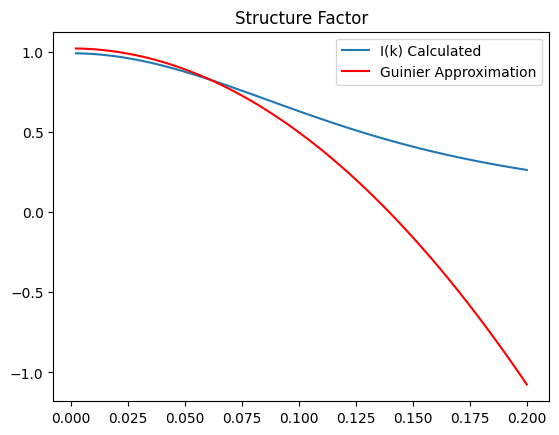

In [44]:
plt.plot(K,I,label='I(k) Calculated')
plt.plot(K,I_theory,color='r',label='Guinier Approximation')
plt.title('Structure Factor')
plt.legend()